In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
# from tensorflow_datasets.image import dsprites

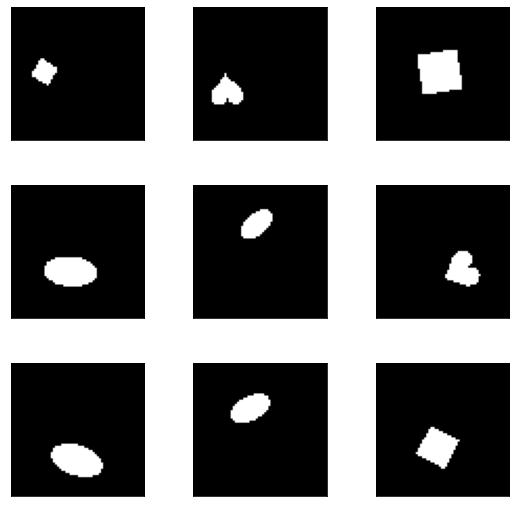

In [14]:
ds, ds_info = tfds.load('Dsprites', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)

In [15]:
print(ds)

<PrefetchDataset shapes: {image: (64, 64, 1), label_orientation: (), label_scale: (), label_shape: (), label_x_position: (), label_y_position: (), value_orientation: (), value_scale: (), value_shape: (), value_x_position: (), value_y_position: ()}, types: {image: tf.uint8, label_orientation: tf.int64, label_scale: tf.int64, label_shape: tf.int64, label_x_position: tf.int64, label_y_position: tf.int64, value_orientation: tf.float32, value_scale: tf.float32, value_shape: tf.float32, value_x_position: tf.float32, value_y_position: tf.float32}>


In [16]:
batch_size = 128
dataset = ds.shuffle(buffer_size=1024).batch(batch_size)

In [17]:
import numpy as np

for elem in dataset:
    np_image = elem['image'].numpy()
    print(np.max(np_image))
    break

1


In [18]:
print(dataset)

<BatchDataset shapes: {image: (None, 64, 64, 1), label_orientation: (None,), label_scale: (None,), label_shape: (None,), label_x_position: (None,), label_y_position: (None,), value_orientation: (None,), value_scale: (None,), value_shape: (None,), value_x_position: (None,), value_y_position: (None,)}, types: {image: tf.uint8, label_orientation: tf.int64, label_scale: tf.int64, label_shape: tf.int64, label_x_position: tf.int64, label_y_position: tf.int64, value_orientation: tf.float32, value_scale: tf.float32, value_shape: tf.float32, value_x_position: tf.float32, value_y_position: tf.float32}>


In [19]:
print(dataset.element_spec)

{'image': TensorSpec(shape=(None, 64, 64, 1), dtype=tf.uint8, name=None), 'label_orientation': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_scale': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_shape': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_x_position': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'label_y_position': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'value_orientation': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_scale': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_shape': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_x_position': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'value_y_position': TensorSpec(shape=(None,), dtype=tf.float32, name=None)}


In [20]:
enum_data = enumerate(dataset)
for step, elem in enum_data:
    train_image_batch = elem["image"]
    print(train_image_batch.shape)

    if step > 2:
        break

(128, 64, 64, 1)
(128, 64, 64, 1)
(128, 64, 64, 1)
(128, 64, 64, 1)


In [23]:
# Compare with MNIST
from tensorflow import keras

# load dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# normalise images
train_images = train_images / 255.0
test_images = test_images / 255.0

# create a dataset (iterable) from the data using a specified batch size
batch_size = 128
mnist = tf.data.Dataset.from_tensor_slices(train_images)
mnist = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(mnist.element_spec)

enum_mnist = enumerate(mnist)
for step, elem in enum_mnist:
    train_image_batch = elem
    # print(train_image_batch)

    if step > 2:
        break

{'image': TensorSpec(shape=(None, None, 64, 64, 1), dtype=tf.uint8, name=None), 'label_orientation': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'label_scale': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'label_shape': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'label_x_position': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'label_y_position': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'value_orientation': TensorSpec(shape=(None, None), dtype=tf.float32, name=None), 'value_scale': TensorSpec(shape=(None, None), dtype=tf.float32, name=None), 'value_shape': TensorSpec(shape=(None, None), dtype=tf.float32, name=None), 'value_x_position': TensorSpec(shape=(None, None), dtype=tf.float32, name=None), 'value_y_position': TensorSpec(shape=(None, None), dtype=tf.float32, name=None)}


In [24]:
x = (1, 3, 5)
if isinstance(x, tuple):
    x = x[0]
print(x)

1
